# **Adaline**

Is a neural network similiar to the Perceptron but adding a learnrate to weight the adjustment and using the float output (before applying the step function) for weight adjustment for more detailed output possibilities.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path += ["./src", "../"]

import ann106 as ann

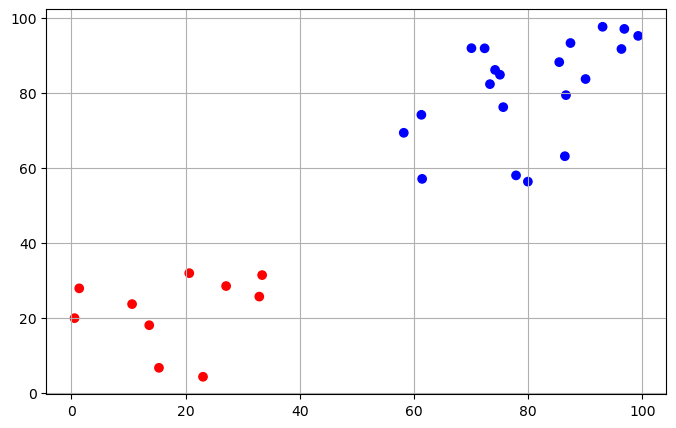

In [2]:
X_1 = np.concat((np.random.uniform(50, 100, 20).reshape(-1, 1), np.random.uniform(50, 100, 20).reshape(-1, 1)), axis=1)
X_2 = np.concat((np.random.uniform(0, 40, 10).reshape(-1, 1), np.random.uniform(0, 40, 10).reshape(-1, 1)), axis=1)
X = np.concat((X_1, X_2), axis=0)
y = np.concat((np.full((20), -1), np.full((10), 1)), axis=0)
colors = ["r" if cur_y == 1 else "b" for cur_y in y]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
ax.scatter(X[:,0], X[:,1], c=colors)
ax.grid()

In [3]:
def my_step_function(sum_value):
    return ann.activation_functions.step_function(sum_value, threshold=0.0, greater_equal_value=1, smaller_value=-1)

class Adaline(ann.base.ArtificialNeuralNetwork):
    def __init__(self):
        super().__init__()
        self.prediction_elements_tuple = {
            "X": True,
            "y": True,
            "y_": False,
            "all_y_": True,
            "error": False
        }
        self.name = "Adaline"
        self.layers = [
                ann.base.Layer(2, 1, None), 
                # ann.base.Layer(None, None, my_step_function)
                    ]

    def update_weights(self, prediction_element):
        # extract needed elements
        cur_X, cur_y, cur_y_pred = prediction_element 
        cur_y_pred = cur_y_pred[0]
        cur_error = cur_y - cur_y_pred
        
        delta_weights = self.get_lr() * cur_error * cur_X
        self.layers[0].weights = self.layers[0].weights+delta_weights

        self.layers[0].bias = self.layers[0].bias + self.get_lr() * cur_error

    def loss_function(self, y, y_):
        return {"Sum Loss":ann.loss_functions.sum_error(y, y_)} # y - y_

    def predict(self, x):
        x = self.scale(x)
        # return self.forward(x)
        return ann.activation_functions.step_function(self.forward(x), threshold=0.0, greater_equal_value=1, smaller_value=-1)

In [4]:
model = Adaline()
model.predict(X[0])

-1

In [5]:
model = Adaline()
# model.add_layer(2, 1, None)
# model.add_layer(None, None, ann.activation_functions.heaviside)
learn_rate_scheduler = ann.learn_rate.LearnrateScheduler(start_learnrate=0.005)
model.train(X=X, y=y, epochs=500, parallel_computing=False, print_ever_x_steps=1000,
            learn_rate_scheduler=learn_rate_scheduler)
model.eval(X=X, y=y)



--------------------------------
Training - 09:18 23.01.2025

| epoch:   499 || step:    15000 || ETA:  0:00:00 || total loss:   -0.001 ||  Sum Loss:   -0.001 |

Total Progress: |##########|    Epoch Progress: |##########|



Congratulations!!!🥳
🚀 Your model 🚀 waits here for you:
      -> './models\Adaline.pkl'


np.int64(0)

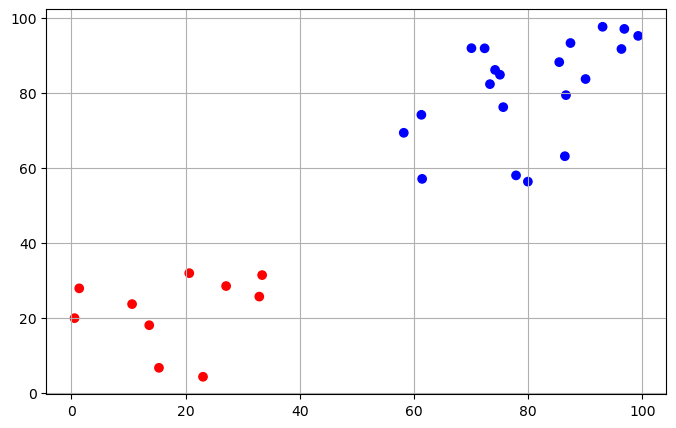

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
colors = ["r" if cur_y  == 1 else "b" for cur_y in [model.predict(x) for x in X]]
ax.scatter(X[:,0], X[:,1], c=colors)
ax.grid()

In [7]:
help(model.loss_plot)

Help on method loss_plot in module ann106.base:

loss_plot(width=8, height=5, smoothing_size=1, should_show=True, loss_name=None) method of __main__.Adaline instance
    Plots the loss/error of the latest training.
    
    :param width: Width of the plot in inch.
    :type width: int
    :param height: Height of the plot in inch.
    :type height: int
    :param smoothing_size: Window size for moving average, to smooth the plot. 
    :type smoothing_size: int ( >= 1 and <= total steps)
    :param should_show: Defines whether to show the plot or not.
    :type should_show: bool
    :param loss_name: To get the loss plot for one specific loss. If None, the losses get summed/stacked.
    :type loss_name: str



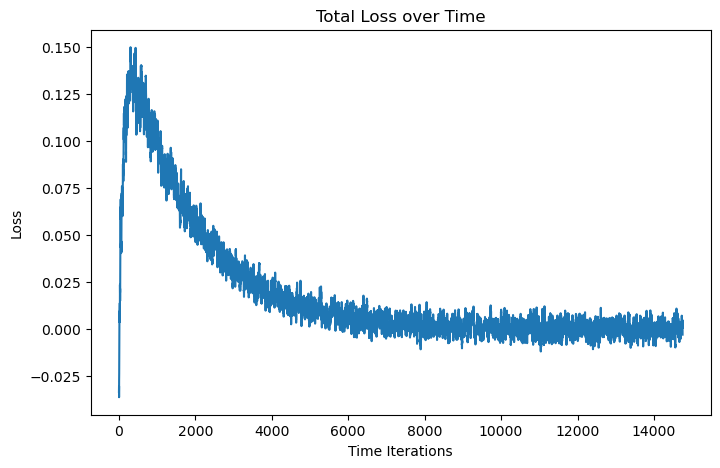

In [8]:
model.loss_plot(smoothing_size=250)

On non-linear data

Matplotlib Style: seaborn-v0_8-pastel


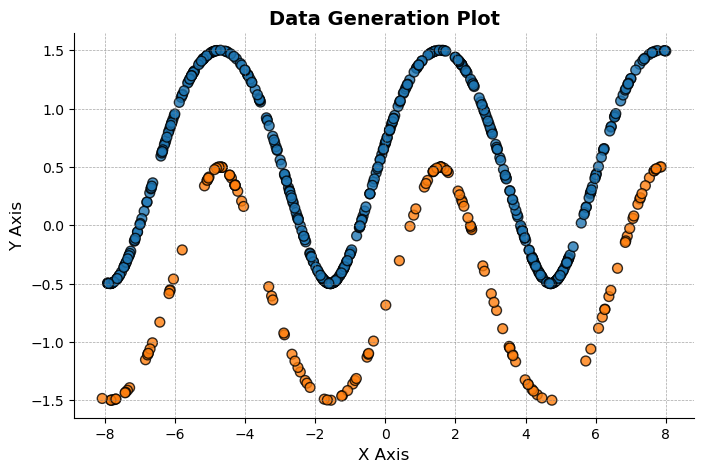

In [9]:
X, y = ann.data.data_generator_binary_classification(
                            x_value_range_class_1=(-8, 8), y_value_range_class_1=(0.5, 0.5), 
                            x_value_range_class_2=(-8, 8), y_value_range_class_2=(-0.5, -0.5), 
                            value_amount_class_1=500, value_amount_class_2=150,
                            func=np.sin, plotting=True, plot_style=None)
y = np.where(y==0, -1, y)

In [10]:
model = Adaline()
learn_rate_scheduler = ann.learn_rate.LearnrateScheduler(start_learnrate=0.005)
model.train(X=X, y=y, epochs=500, parallel_computing=False, print_ever_x_steps=1000,
            learn_rate_scheduler=learn_rate_scheduler)
model.eval(X=X, y=y, group_function=np.mean)



--------------------------------
Training - 09:18 23.01.2025

| epoch:   499 || step:   325000 || ETA:  0:00:00 || total loss:   -0.010 ||  Sum Loss:   -0.010 |

Total Progress: |##########|    Epoch Progress: |##########|



Congratulations!!!🥳
🚀 Your model 🚀 waits here for you:
      -> './models\Adaline.pkl'


np.float64(0.3169230769230769)

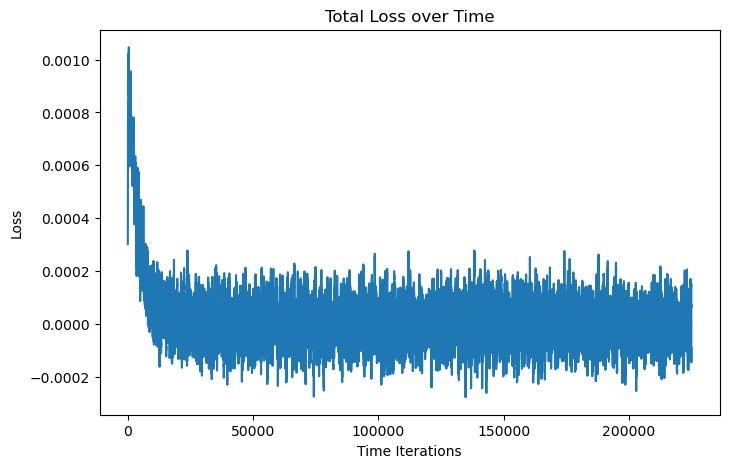

In [11]:
model.loss_plot(smoothing_size=100000)

The error reduces a bit because it optimizes the line between the two classes. But this neural network can't pass a good result, because it can't represent/learn a non linear function. 

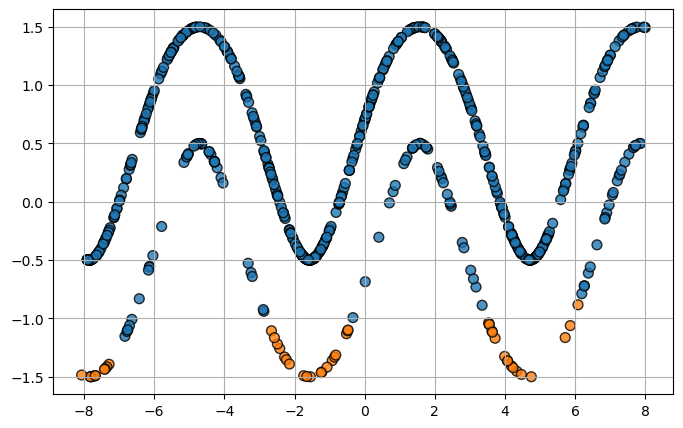

In [12]:
plt.style.use('seaborn-v0_8-dark-palette')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
colors = ["#ff7f0e" if cur_y  == 1 else "#1f77b4" for cur_y in [model.predict(x) for x in X]]
ax.scatter(X[:,0], X[:,1], c=colors, s=50, edgecolor='k', alpha=0.8)
ax.grid()
plt.style.use('default')

Using ann106 lib

In [13]:
model = ann.neural_networks.Adaline()
learn_rate_scheduler = ann.learn_rate.LearnrateScheduler(start_learnrate=0.01)
model.train(X=X, y=y, epochs=2000, parallel_computing=False, print_ever_x_steps=100000,
            learn_rate_scheduler=learn_rate_scheduler)
model.eval(X=X, y=y)



--------------------------------
Training - 09:19 23.01.2025

| epoch:  1999 || step:  1300000 || ETA:  0:00:00 || total loss:    0.585 ||  MSE:    0.585 |

Total Progress: |##########|    Epoch Progress: |##########|



Congratulations!!!🥳
🚀 Your model 🚀 waits here for you:
      -> './models\Adaline.pkl'


np.float64(0.3076923076923077)

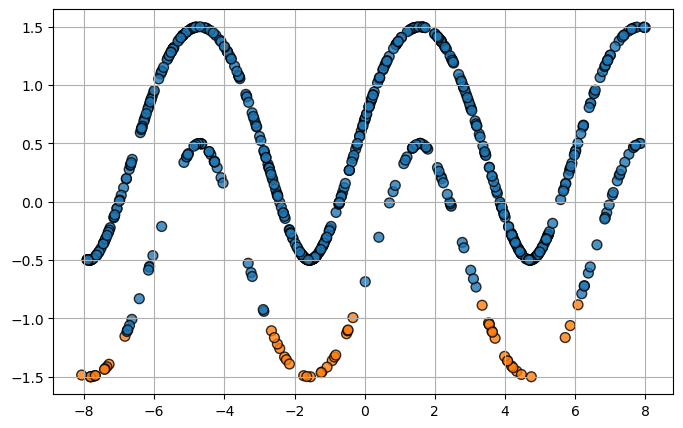

In [14]:
plt.style.use('seaborn-v0_8-dark-palette')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
colors = ["#ff7f0e" if cur_y  == 1 else "#1f77b4" for cur_y in [model.predict(x) for x in X]]
ax.scatter(X[:,0], X[:,1], c=colors, s=50, edgecolor='k', alpha=0.8)
ax.grid()
plt.style.use('default')